# Project: Investigating tmdb-movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

The dataset I choose to analyze is tmdb-movie dataset. When I was exploring the data set, I have some questions. First, which genre receive higher revenue, action or comedy? Second, which one is more likely to have higher popularity, comedy or action? To build my report. I need some dependent variables and independent variables. Here, revenue and popularity are my dependent variables. Genres, original title, release time, budget are indenpendent variables.

#Cell below are all packages that I plan to use for my analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling
 
After looking at the several rows of the data set, checking the null value and data type of each variable, I found the popularity is float and revenue is int. So I don't need worry about the data type of these 2 variables. Variable genres has 30 missing value. I cannot just randomly assign any values or assign any genre to it. So I choose to drop the rows that has no genre speicified by dropna() function. Becuase variables such as original title, release_year have no null value, I don't need worry about these two variables when I use the dropna() function. 

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10845 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10845 non-null  float64
 3   budget                10845 non-null  int64  
 4   revenue               10845 non-null  int64  
 5   original_title        10845 non-null  object 
 6   cast                  10750 non-null  object 
 7   homepage              2953 non-null   object 
 8   director              10781 non-null  object 
 9   tagline               8035 non-null   object 
 10  keywords              9369 non-null   object 
 11  overview              10841 non-null  object 
 12  runtime               10844 non-null  object 
 13  genres                10815 non-null  object 
 14  production_companies  9831 non-null   object 
 15  release_date       

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                  object
genres                   object
production_companies     object
release_date             object
vote_count               object
vote_average             object
release_year             object
budget_adj               object
revenue_adj              object
Unnamed: 21              object
Unnamed: 22              object
Unnamed: 23              object
Unnamed: 24              object
Unnamed: 25              object
Unnamed: 26             float64
Unnamed: 27             float64
Unnamed: 28             float64
Unnamed: 29             float64
Unnamed: 30             float64
dtype: o

In [6]:
type(df['release_date'][0])

str

In [7]:
new_data=df[['genres', 'popularity', 'original_title','release_year','revenue']].dropna(axis=0, how='any')

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10844
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          10815 non-null  object 
 1   popularity      10815 non-null  float64
 2   original_title  10815 non-null  object 
 3   release_year    10815 non-null  object 
 4   budget          10815 non-null  int64  
 5   revenue         10815 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 591.4+ KB


In [9]:
print(new_data)

                                          genres  popularity  \
0      Action|Adventure|Science Fiction|Thriller   32.985763   
1      Action|Adventure|Science Fiction|Thriller   28.419936   
2             Adventure|Science Fiction|Thriller   13.112507   
3       Action|Adventure|Science Fiction|Fantasy   11.173104   
4                          Action|Crime|Thriller    9.335014   
...                                          ...         ...   
10840                                Documentary    0.080598   
10841                     Action|Adventure|Drama    0.065543   
10842                             Mystery|Comedy    0.065141   
10843                              Action|Comedy    0.064317   
10844                                     Horror    0.035919   

                     original_title release_year     budget     revenue  
0                    Jurassic World         2015  150000000  1513528810  
1                Mad Max: Fury Road         2015  150000000   378436354  
2        

#To do the comparsion between comedy and Action movie, I need to create a dataset that only has comedy and acttion movie. I use the str.contain() fucntion to find any word related to 'Action' and 'comedy' in the column genre. Becuase most movies have combination of several genres. It is hard for me to do analysis. So I decide to separte the genre out. So I create two new data sets named action_df and comedy_df. I also create a new column called genre in both data sets for later combination of two data sets

In [11]:
action_df=new_data[new_data['genres'].str.contains("Action")]

In [12]:
action_df

,genres,popularity,original_title,release_year,budget,revenue
0,Action|Adventure|Science Fiction|Thriller,32.985763,Jurassic World,2015,150000000,1513528810
1,Action|Adventure|Science Fiction|Thriller,28.419936,Mad Max: Fury Road,2015,150000000,378436354
3,Action|Adventure|Science Fiction|Fantasy,11.173104,Star Wars: The Force Awakens,2015,200000000,2068178225
4,Action|Crime|Thriller,9.335014,Furious 7,2015,190000000,1506249360
6,Science Fiction|Action|Thriller|Adventure,8.654359,Terminator Genisys,2015,155000000,440603537
...,...,...,...,...,...,...
10829,Action|Drama|Thriller|Crime|Mystery,0.202473,Harper,1966,0,0
10830,Adventure|Drama|Action|Family|Foreign,0.342791,Born Free,1966,0,0
10836,Action|Western,0.131378,Nevada Smith,1966,0,0
10841,Action|Adventure|Drama,0.065543,Grand Prix,1966,0,0


In [13]:
comedy_df=new_data[new_data['genres'].str.contains("Comedy")]

In [14]:
comedy_df

,genres,popularity,original_title,release_year,budget,revenue
8,Family|Animation|Adventure|Comedy,7.404165,Minions,2015,74000000,1156730962
9,Comedy|Animation|Family,6.326804,Inside Out,2015,175000000,853708609
12,Action|Comedy|Science Fiction,5.984995,Pixels,2015,88000000,243637091
23,Comedy|Drama,4.648046,The Big Short,2015,28000000,133346506
25,Comedy,4.564549,Ted 2,2015,68000000,215863606
...,...,...,...,...,...,...
10835,Comedy|Drama|Family,0.140934,The Ugly Dachshund,1966,0,0
10837,Comedy|War,0.317824,"The Russians Are Coming, The Russians Are Coming",1966,0,0
10839,Comedy,0.087034,Carry On Screaming!,1966,0,0
10842,Mystery|Comedy,0.065141,Beregis Avtomobilya,1966,0,0


#Here, I create an new array named genre_action and genre_comedy with 2365 values all named action and an new array named genre_comedy with 3782 values all named comedy 

In [15]:
genre_action=np.repeat("action",2365)

In [17]:
print(genre_action)

['action' 'action' 'action' ... 'action' 'action' 'action']


In [18]:
genre_comedy=np.repeat("comedy",3782)

In [19]:
print(genre_comedy)

['comedy' 'comedy' 'comedy' ... 'comedy' 'comedy' 'comedy']


In [20]:
comedy_df['genre']=genre_comedy

<ipython-input-20-8b00ff5a3a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_df['genre']=genre_comedy


In [21]:
print(comedy_df)

                                  genres  popularity  \
8      Family|Animation|Adventure|Comedy    7.404165   
9                Comedy|Animation|Family    6.326804   
12         Action|Comedy|Science Fiction    5.984995   
23                          Comedy|Drama    4.648046   
25                                Comedy    4.564549   
...                                  ...         ...   
10835                Comedy|Drama|Family    0.140934   
10837                         Comedy|War    0.317824   
10839                             Comedy    0.087034   
10842                     Mystery|Comedy    0.065141   
10843                      Action|Comedy    0.064317   

                                         original_title release_year  \
8                                               Minions         2015   
9                                            Inside Out         2015   
12                                               Pixels         2015   
23                                     

#assign the values in the array named genre_action to a new column genre in the action_df and the values in the array named genre_comedy to a new column genre in the comedy_df

In [22]:
action_df['genre']=genre_action

<ipython-input-22-6197a425f8cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df['genre']=genre_action


In [23]:
print(action_df)

                                          genres  popularity  \
0      Action|Adventure|Science Fiction|Thriller   32.985763   
1      Action|Adventure|Science Fiction|Thriller   28.419936   
3       Action|Adventure|Science Fiction|Fantasy   11.173104   
4                          Action|Crime|Thriller    9.335014   
6      Science Fiction|Action|Thriller|Adventure    8.654359   
...                                          ...         ...   
10829        Action|Drama|Thriller|Crime|Mystery    0.202473   
10830      Adventure|Drama|Action|Family|Foreign    0.342791   
10836                             Action|Western    0.131378   
10841                     Action|Adventure|Drama    0.065543   
10843                              Action|Comedy    0.064317   

                     original_title release_year     budget     revenue  \
0                    Jurassic World         2015  150000000  1513528810   
1                Mad Max: Fury Road         2015  150000000   378436354   
3     

#movie_df is the combination of the action_df and comedy_df

In [25]:
movie_df=action_df.append(comedy_df)

In [26]:
print(movie_df)

                                          genres  popularity  \
0      Action|Adventure|Science Fiction|Thriller   32.985763   
1      Action|Adventure|Science Fiction|Thriller   28.419936   
3       Action|Adventure|Science Fiction|Fantasy   11.173104   
4                          Action|Crime|Thriller    9.335014   
6      Science Fiction|Action|Thriller|Adventure    8.654359   
...                                          ...         ...   
10835                        Comedy|Drama|Family    0.140934   
10837                                 Comedy|War    0.317824   
10839                                     Comedy    0.087034   
10842                             Mystery|Comedy    0.065141   
10843                              Action|Comedy    0.064317   

                                         original_title release_year  \
0                                        Jurassic World         2015   
1                                    Mad Max: Fury Road         2015   
3              

<a id='eda'></a>
## Exploratory Data Analysis

## Q1:Which genre receive higher revenue, action or comedy? 

In [39]:
genre_groupby=movie_df.groupby('genre').mean()

In [40]:
print(genre_groupby)

        popularity        budget       revenue
genre                                         
action    0.926496  2.778187e+07  7.305185e+07
comedy    0.593285  1.332417e+07  3.760735e+07


Text(0, 0.5, 'revenue')

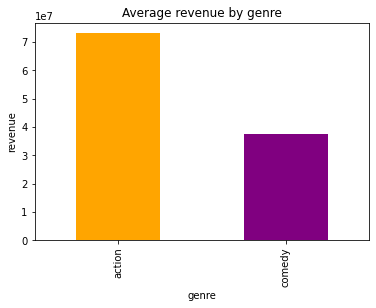

In [27]:
colors=['orange', 'purple']
ax=movie_df.groupby('genre').mean()['revenue'].plot(kind='bar', title='Average revenue by genre', color=colors)
ax.set_ylabel('revenue')

## Q2: Which one is more likely to have higher popularity, comedy or action?

#calculated the median popularity in data set new_data, select all rows in movie_df that having popularity >=0.384958(median), later groupby using genre, then count how many comedy and action match that criteria

In [28]:
new_data['popularity'].median()

0.384958

In [29]:
popularity_high=movie_df.query('popularity >= 0.384958')

In [30]:
print(popularity_high)

                                              genres  popularity  \
0          Action|Adventure|Science Fiction|Thriller   32.985763   
1          Action|Adventure|Science Fiction|Thriller   28.419936   
3           Action|Adventure|Science Fiction|Fantasy   11.173104   
4                              Action|Crime|Thriller    9.335014   
6          Science Fiction|Action|Thriller|Adventure    8.654359   
...                                              ...         ...   
10789                  Comedy|Horror|Science Fiction    0.409587   
10799                        Animation|Family|Comedy    1.227582   
10806  Family|Adventure|Comedy|Science Fiction|Crime    0.410366   
10810                                 Romance|Comedy    0.529721   
10812                           Comedy|Crime|Romance    0.737730   

                        original_title release_year     budget     revenue  \
0                       Jurassic World         2015  150000000  1513528810   
1                   Mad Max

In [31]:
total=new_data.query('popularity >=0.384958').count()['popularity']

In [32]:
print(total)

5408


In [33]:
genre_high=popularity_high.groupby('genre').count()['popularity']

In [34]:
print(genre_high)

genre
action    1409
comedy    1918
Name: popularity, dtype: int64


#to see which one is more likely to have higher popularity, I calculated the proportion of comedy or action in the entire datasets that having popularity >=median 0.384958

Text(0, 0.5, 'proportion')

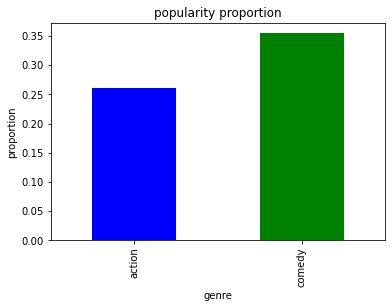

In [36]:
colors=['blue','green']
total=new_data.query('popularity >=0.384958').count()['popularity']
proportions=genre_high/total
ax2=proportions.plot(kind='bar', title= 'popularity proportion',color=colors)
ax2.set_ylabel('proportion')

# Conclusions: Action movie has higher reveune than comedy movie. Comedy movie is more likely to have higher popularity. 